# This model is trained with public dataset which have been collected from kaggle 

In [1]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("emails.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [15]:
df.loc[df['spam']==1].shape

(1368, 2)

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.shape

(5728, 2)

In [5]:
#Dropping Duplicates Value
df.drop_duplicates(inplace =  True)

In [6]:
df.shape

(5695, 2)

In [7]:
#checking for invalid NaN or null values 
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
#downloading Stop Words for filtering out them from the text feature 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanjil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#this functions remove puntuation and stop words from any feature that has messages or strings
def process_text(text):
    
    # remmove puntuation
    
    no_pun = [char for char in text if char not in string.punctuation]
    no_pun = ''.join(no_pun)
    
    #remove stop words
    
    clean_words = [ word for word in no_pun.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words    

In [10]:
#implemnetation of the thfuction over the message column
df['text'].apply(process_text)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5695, dtype: object

In [11]:
#convert a collection of text to matrix of tokens(represnetation of words ) counts in order to fetch the feature to model to learn

from sklearn.feature_extraction.text import CountVectorizer
message_bag_of_words = CountVectorizer(analyzer = process_text).fit_transform(df['text'])

In [12]:
#get the shape of messages_bow 
message_bag_of_words.shape

(5695, 37229)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(message_bag_of_words, df['spam'],test_size = 0.2, random_state = 0)

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier().fit(x_train,y_train)

y_predict = DecisionTree.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       870
           1       0.94      0.90      0.92       269

    accuracy                           0.96      1139
   macro avg       0.95      0.94      0.95      1139
weighted avg       0.96      0.96      0.96      1139


confusion_matrix 
[[854  16]
 [ 28 241]]

 Accuracy Score 
 0.961369622475856


## naive Bayes MultinomialNB

In [37]:
#create and train the naive Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB().fit(x_train,y_train)
y_predict = MultinomialNB.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


confusion_matrix 
[[862   8]
 [  1 268]]

 Accuracy Score 
 0.9920983318700615


### KNN(K- Nearest Neighbors) classifier .

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train,y_train)

y_predict = knn.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       870
           1       0.92      0.63      0.75       269

    accuracy                           0.90      1139
   macro avg       0.91      0.81      0.84      1139
weighted avg       0.90      0.90      0.89      1139


confusion_matrix 
[[855  15]
 [ 99 170]]

 Accuracy Score 
 0.8999122036874452


### Support Vector classifier.

In [39]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

y_predict = svc.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       870
           1       0.98      0.86      0.91       269

    accuracy                           0.96      1139
   macro avg       0.97      0.93      0.95      1139
weighted avg       0.96      0.96      0.96      1139


confusion_matrix 
[[865   5]
 [ 38 231]]

 Accuracy Score 
 0.9622475856014048


### Ensamble Learning Algorithm

In [40]:
from sklearn. ensemble import VotingClassifier
votingClf = VotingClassifier(estimators=[('decisionTree',DecisionTree),
('naiveBayes',MultinomialNB),('knn',knn),('svc',svc)],voting='hard')
votingClf.fit(x_train,y_train)

y_predict = votingClf.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       870
           1       1.00      0.85      0.92       269

    accuracy                           0.96      1139
   macro avg       0.98      0.93      0.95      1139
weighted avg       0.97      0.96      0.96      1139


confusion_matrix 
[[869   1]
 [ 40 229]]

 Accuracy Score 
 0.9640035118525022


### Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=4)
bagging.fit(x_train,y_train)

y_predict = bagging.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       870
           1       0.94      0.89      0.92       269

    accuracy                           0.96      1139
   macro avg       0.95      0.94      0.95      1139
weighted avg       0.96      0.96      0.96      1139


confusion_matrix 
[[855  15]
 [ 29 240]]

 Accuracy Score 
 0.961369622475856


### Ada Boost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(n_estimators=4)
adaBoost.fit(x_train,y_train)

y_predict = adaBoost.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       870
           1       0.69      0.96      0.80       269

    accuracy                           0.89      1139
   macro avg       0.84      0.91      0.86      1139
weighted avg       0.92      0.89      0.89      1139


confusion_matrix 
[[755 115]
 [ 12 257]]

 Accuracy Score 
 0.8884986830553117


### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=4)
randomForest.fit(x_train,y_train)

y_predict = randomForest.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       870
           1       0.98      0.81      0.89       269

    accuracy                           0.95      1139
   macro avg       0.96      0.90      0.93      1139
weighted avg       0.95      0.95      0.95      1139


confusion_matrix 
[[866   4]
 [ 52 217]]

 Accuracy Score 
 0.9508340649692713


In [44]:
dict_acc ={'decisionTree':accuracy_score(y_test,DecisionTree.predict(x_test)),
           'naiveBayes':accuracy_score(y_test,MultinomialNB.predict(x_test)),
           'KNN':accuracy_score(y_test,knn.predict(x_test)),
           'SVC':accuracy_score(y_test,svc.predict(x_test)),
           'Ensemble_voting':accuracy_score(y_test,votingClf.predict(x_test)),
           'bagging':accuracy_score(y_test,bagging.predict(x_test)),
           'AdaBoost':accuracy_score(y_test,adaBoost.predict(x_test)),
           'Random Forest':accuracy_score(y_test,randomForest.predict(x_test))
           }

In [45]:
for i in dict_acc:
    print(f"{i}\t\n\t{dict_acc[i]}")

decisionTree	
	0.961369622475856
naiveBayes	
	0.9920983318700615
KNN	
	0.8999122036874452
SVC	
	0.9622475856014048
Ensemble_voting	
	0.9640035118525022
bagging	
	0.961369622475856
AdaBoost	
	0.8884986830553117
Random Forest	
	0.9508340649692713


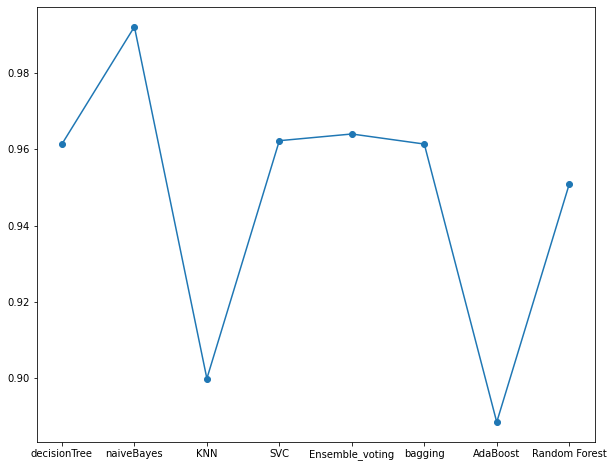

In [46]:
keyes = [i for i in dict_acc]
values = [dict_acc[i]for i in dict_acc]

plt.figure(figsize=(10,8))
plt.plot(keyes,values)
plt.scatter(list(range(8)),values)

plt.show()

## Testing the perfomances with real time data

In [56]:
import glob
csv_list=glob.glob(r"C:\Users\tanjil\Documents\Python Scripts\CLASS\os\*.csv")

In [57]:
df_list = [pd.read_csv(csv_list[i]) for i in range(2,len(csv_list))]

In [58]:
concatanated_mails_text = []

for i in df_list:
    concatanated_mails_text=concatanated_mails_text+list(i['Subject'])

In [59]:
reaL_val=pd.DataFrame()
reaL_val['text_real']=concatanated_mails_text
reaL_val['text_real'].apply(process_text)

0             [Microsoft, Excel, Learner, Professional]
1                         [Statistical, Analysis, SPSS]
2            [5, Trends, Higher, Education, Look, 2022]
3     [Bdjobs, eLearning, utf8QE0A68FE0A6B6E0A781, u...
4           [Save, Rewards, Points, Low, Fare, Flights]
5     [Sunni, Marriage, Profiles, eBook, PDF, Downlo...
6               [Delivery, Status, Notification, Delay]
7               [Delivery, Status, Notification, Delay]
8     [Master, Application, process, step, step, guide]
9             [Delivery, Status, Notification, Failure]
10                  [utf8B4pyIIFdlbGNvbWUsIFNwcmluZyEg]
11                  [full, 4k, system, AI, dahua, cctv]
12    [Following, documentinformation, required, pro...
13    [EPFC, Votre, UTF8BcHJpb3JpdMOp, du, 15, au, 1...
14    [Following, documentinformation, required, pro...
15    [Following, documentinformation, required, pro...
16                                    [utf8QHello20Pal]
17    [0406000015242309, Transaction, Release, C

In [62]:
x_test = CountVectorizer(analyzer = process_text).fit_transform(reaL_val['text_real'])

In [63]:
for i in dict_acc:
    print(f"{i}\t\n\t{dict_acc[i]}")

decisionTree	
	0.961369622475856
naiveBayes	
	0.9920983318700615
KNN	
	0.8999122036874452
SVC	
	0.9622475856014048
Ensemble_voting	
	0.9640035118525022
bagging	
	0.961369622475856
AdaBoost	
	0.8884986830553117
Random Forest	
	0.9508340649692713


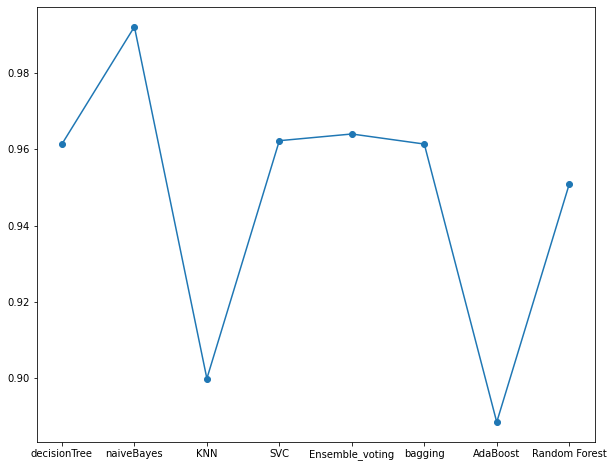

In [64]:
keyes = [i for i in dict_acc]
values = [dict_acc[i]for i in dict_acc]

plt.figure(figsize=(10,8))
plt.plot(keyes,values)
plt.scatter(list(range(8)),values)

plt.show()

In [66]:
import json
with open("email_model.json", "w") as fp:
    json.dump(dict_acc,fp)